# Projeto Machine Learning

## Banco de Dados sobre a Análise das Características e Personalidades a partir dos Registros dos Clientes de uma Empresa de Alimentos.
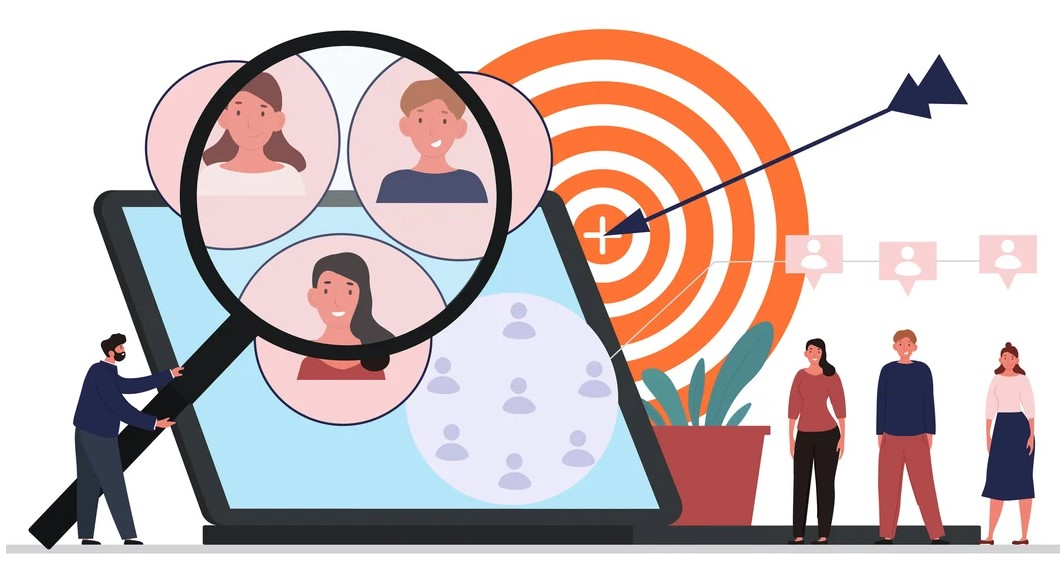

## Glossário do conjunto de dados (em colunas)

- ID: identificador exclusivo do cliente
- Year_Birth: Ano de nascimento do cliente
- Education: nível de escolaridade do cliente
- Marital_Status: estado civil do cliente
- Income: renda familiar anual do cliente
- Kidhome: Número de crianças na residência do cliente
- Teenhome: Número de adolescentes na residência do cliente
- Dt_Customer: Data de cadastro do cliente na empresa
- Recency: número de dias desde a última compra do cliente
- Recover: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário
Produtos

- MntWines: Valor gasto em vinho nos últimos 2 anos
- MntFruits: Valor gasto com frutas nos últimos 2 anos
- MntMeatProducts: Valor gasto com carne nos últimos 2 anos
- MntFishProducts: Valor gasto com pescado nos últimos 2 anos
- MntSweetProducts: Valor gasto em doces nos últimos 2 anos
- MntGoldProds: Valor gasto em ouro nos últimos 2 anos

- NumDealsPurchases: Número de compras realizadas com desconto
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
- Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

- NumWebPurchases: Quantidade de compras realizadas pelo site da empresa
- NumCatalogPurchases: Número de compras feitas usando um catálogo
- NumStorePurchases: Número de compras feitas diretamente nas lojas
- NumWebVisitsMonth: Número de visitas ao site da empresa no último mês

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import seaborn as sns
import warnings
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projeto - Machine Learning II/marketing_campaign.csv', sep="\t")

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Conhecendo os Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Podemos perceber que a única coluna que apresenta valores nulos é a coluna 'Income' e são somente 24 registros, logo, a exclusão desses registros torna-se viável, evitando possíveis problemas no decorrer da análise dos dados.**

In [ ]:
df = df.dropna()
df.value_counts().sum()

2216

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Percorrer colunas categóricas para a contagem de valores exclusivos

unique_value_counts = {}

for column in df.select_dtypes(include=['object']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'Education': 5, 'Marital_Status': 8, 'Dt_Customer': 662}


In [ ]:
# Percorrer colunas numéricas para a contagem de valores exclusivos
unique_value_counts = {}

for column in df.select_dtypes(include=['int64', 'float']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'ID': 2216, 'Year_Birth': 59, 'Income': 1974, 'Kidhome': 3, 'Teenhome': 3, 'Recency': 100, 'MntWines': 776, 'MntFruits': 158, 'MntMeatProducts': 554, 'MntFishProducts': 182, 'MntSweetProducts': 176, 'MntGoldProds': 212, 'NumDealsPurchases': 15, 'NumWebPurchases': 15, 'NumCatalogPurchases': 14, 'NumStorePurchases': 14, 'NumWebVisitsMonth': 16, 'AcceptedCmp3': 2, 'AcceptedCmp4': 2, 'AcceptedCmp5': 2, 'AcceptedCmp1': 2, 'AcceptedCmp2': 2, 'Complain': 2, 'Z_CostContact': 1, 'Z_Revenue': 1, 'Response': 2}


In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df[df.duplicated()].sum()

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [ ]:
df.describe(percentiles=[.05,.5,.25,.75,.95,.99])

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
5%,572.750000,1950.000000,18985.500000,0.000000,0.000000,4.000000,3.000000,0.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
95%,10676.500000,1988.000000,84130.000000,1.000000,1.000000,94.000000,1000.250000,122.250000,687.500000,169.000000,...,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.0,11.0,1.000000
99%,11074.850000,1992.000000,94458.800000,2.000000,2.000000,98.000000,1285.000000,172.000000,914.700000,226.700000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.0,11.0,1.000000


In [ ]:
df.Education.value_counts(dropna=False, normalize=True)

Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: float64

In [ ]:
df.Marital_Status.value_counts(dropna=False, normalize=True)

Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: float64

## Análise Exploratória

Cerca de 88% de nossos clientes se formaram ou mais, o que nos dá uma boa dica sobre as faixas etárias que podemos observar.
- Extrair a “Idade” de um cliente pelo “Year_Birth” indicando o ano de nascimento da respectiva pessoa
- Substituir  "Alone" por "Single".

Parece que certos indivíduos não responderam positivamente às perguntas sobre este assunto.

Se verificarmos que esta coluna em particular carece de um valor informativo substancial, pode ser prudente contemplar a sua omissão.

Engenharia de recursos:
Uma abordagem poderia envolver a categorização de instâncias rotuladas como

- "YOLO" e "Absurdo" como "Single".
- Simplificar a coluna `Marital Status`, categorizando como "Partner" ou "Not Partner"

- Mesma abordagem para a coluna `Graduated`, categorizando-a em "Post Graduated" "Graduated" ou "Not Graduated".

In [ ]:
df_copy = df.copy()

In [ ]:
def initial_cleaning(df):
    """Do the initial changes describe it above"""
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")
    df['Marital_Status'] = df.loc[:,'Marital_Status'].str.replace('Alone','Single')
    df['Marital_Status'] = df.loc[:,'Marital_Status'].apply(lambda x: "Single" if x == 'YOLO' or x == 'Absurd' else x)
    df["Children"]=df["Kidhome"]+df["Teenhome"]
    return df

df_copy = initial_cleaning(df_copy)

In [ ]:
from datetime import datetime

# Obtém o ano atual
ano_atual = datetime.now().year

def feat_engineering(df):
    not_graduated = ['Basic','2n cycle']
    post_graduated = ['Master','PhD']
    couple = ['Married','Together']
    df['Age'] = ano_atual - df['Year_Birth']
    df['Education'] = df['Education'].apply(lambda x: 'Not Graduated' if x in not_graduated else ('Post Graduated' if x in post_graduated else 'Graduated'))
    df['Partner'] = df['Marital_Status'].apply(lambda x: 'Partner' if x in couple else 'Not Partner')
    df["Family_Size"] = df["Partner"].replace({"Not Partner": 1, "Partner":2})+ df["Children"]

    df.drop(['Marital_Status'], axis=1, inplace=True)

    return df

df_copy = feat_engineering(df_copy);

In [ ]:
df_copy.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Partner,Family_Size
0,5524,1957,Graduated,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,3,11,1,0,66,Not Partner,1
1,2174,1954,Graduated,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,3,11,0,2,69,Not Partner,3
2,4141,1965,Graduated,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,3,11,0,0,58,Partner,2
3,6182,1984,Graduated,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,3,11,0,1,39,Partner,3
4,5324,1981,Post Graduated,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,3,11,0,1,42,Partner,3


In [ ]:
sns.set_theme(context= 'notebook')
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('mako')

In [ ]:
def num_plot(df, col):
  """Graph an histogram with a boxplot above
	for one numerical column"""
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
  sns.boxplot(x=col, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
  ax[0].set_xlabel(None)
  ax[0].set(yticks=[])
  sns.histplot(x=col, data=df, ax=ax[1], alpha=.6, color='#7171cf')
  ax[1].set_xlabel(col.replace('_',' ').title(), fontsize=22, loc= 'left')
  plt.axvline(df[col].mean(), color='#39568CFF', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
  plt.axvline(df[col].median(), color='#1F968BFF', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
  plt.axvline(df[col].mode()[0], color='#440154FF', linewidth=2.2, label='mode='+ str(df[col].mode()[0]))
  plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
  plt.tight_layout()
  return ax

def countplot_catcols(df,column,width,height):
	"""Count frequency for each group"""
	fig, ax  = plt.subplots(figsize=(width,height))
	ax=sns.countplot(y=column, data=df,
                  palette='viridis',
                  orient='h',
				  order = df[column].value_counts().index)
	ax.set_xticklabels(ax.get_xticklabels())
	ax.bar_label(ax.containers[0])
	ax.set_title(f'Frequency of {column} categories', loc='left', size=18)
	plt.tight_layout()
	return ax

def barplot_category(df,x,y,title):
  """Plot a barplot"""
  fig, ax  = plt.subplots(figsize=(8,2))
  ax  = sns.barplot(data=df, x=x, y=y,
              orient='h', palette='mako',
              seed=2)
  plt.title(title, loc='left', size=16)
  return ax

### Perfil dos clientes

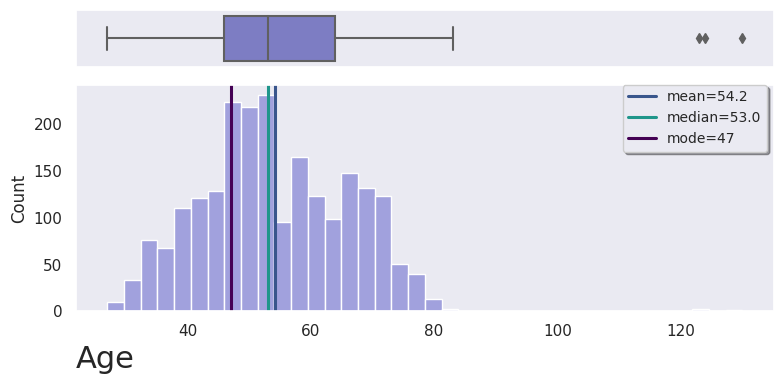

In [ ]:
num_plot(df_copy, 'Age')
plt.show()

In [ ]:
age_clusters = pd.cut(df_copy.Age, [-np.inf,30,60,np.inf],
                      labels=['Young','Adult','Elderly'])
age_clusters.value_counts(normalize=True).sort_index()

Young      0.006769
Adult      0.681859
Elderly    0.311372
Name: Age, dtype: float64

In [ ]:
df_copy['Age_Category'] = age_clusters

**Aproximadamente 76% da nossa base de clientes tem entre 30 e 60 anos. Isso indica que a faixa etária predominante seria a categoria adulta.**

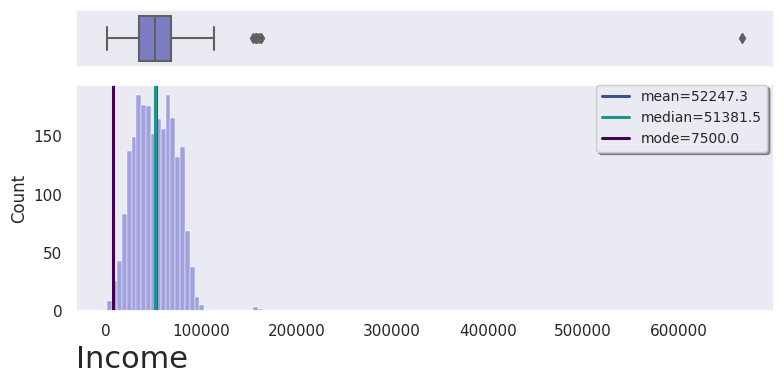

In [ ]:
num_plot(df_copy, 'Income')
plt.show()

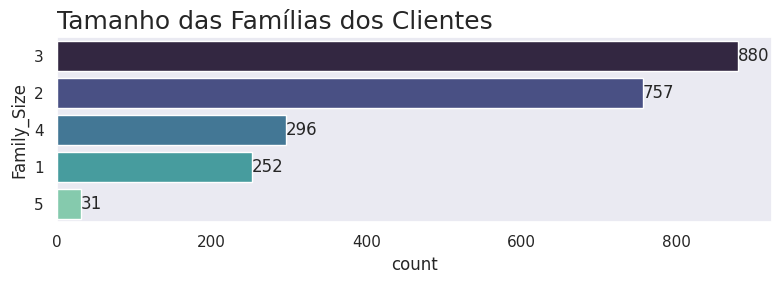

In [ ]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='Family_Size', data=df_copy,
                  palette='mako',
                  orient='h',
				  order = df_copy['Family_Size'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('Tamanho das Famílias dos Clientes', loc='left', size=18)
plt.tight_layout()
plt.show()

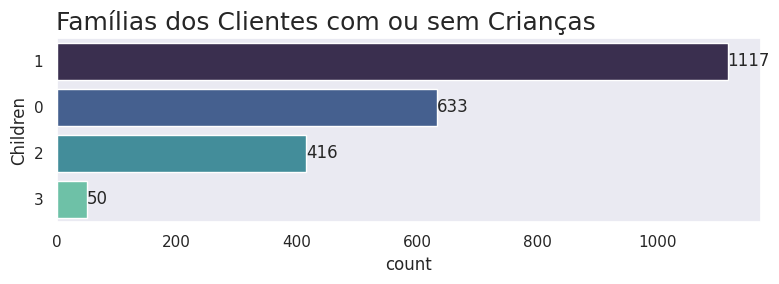

In [ ]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='Children', data=df_copy,
                  palette='mako',
                  orient='h',
				  order = df_copy['Children'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('Famílias dos Clientes com ou sem Crianças', loc='left', size=18)
plt.tight_layout()
plt.show()

**Maioria dos clientes no conjunto de dados tem apenas um jovem ou não tem jovens (adolescentes ou crianças) em casa.**

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

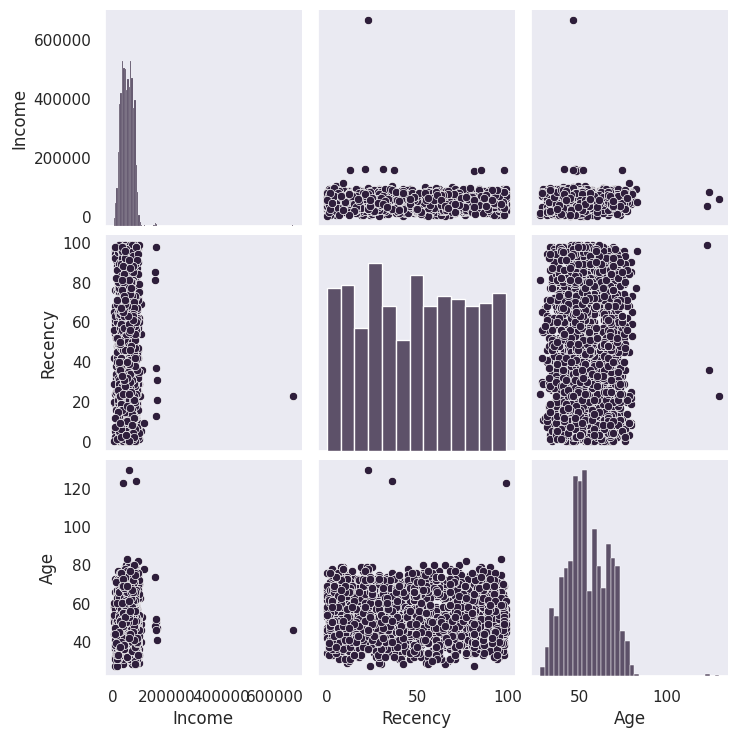

In [ ]:
To_Plot = [ "Income", "Recency", "Age"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df_copy[To_Plot],palette= (["#682F2F","#F3AB60"]))

plt.show()

**É possível perceber alguns outliers nas colunas de Idade ('Age') e Renda ('Income'). Logo, isso será tratado**

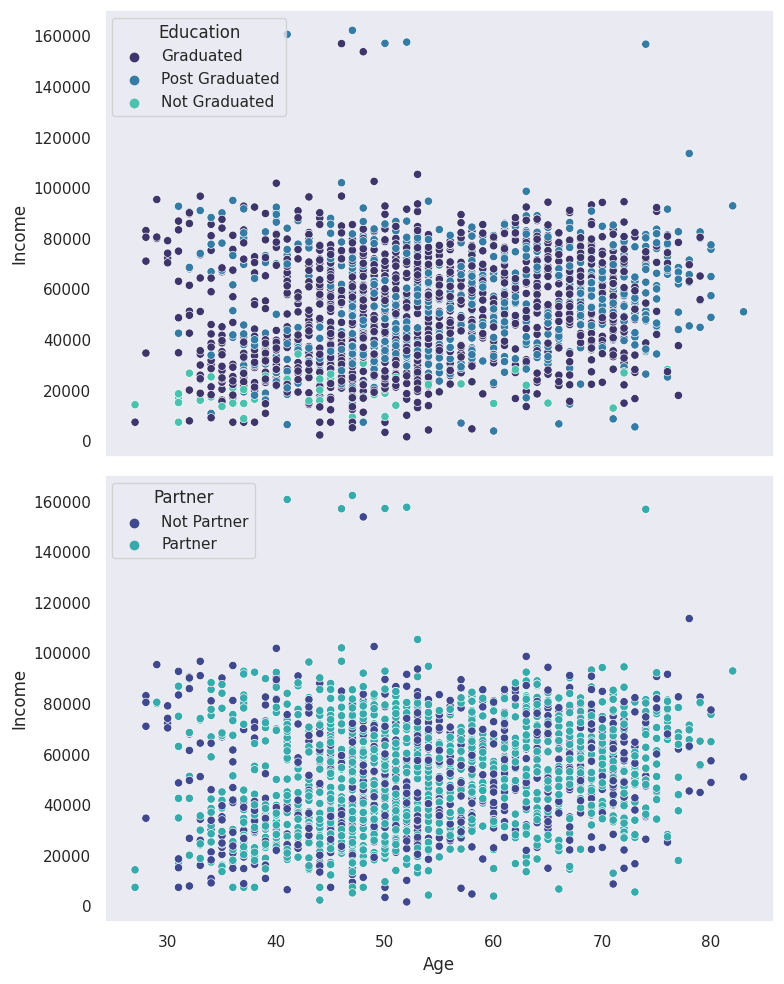

In [ ]:
df_without_outliers = df_copy.loc[(df_copy.Age < 100) & (df_copy.Income < 600_000)]

fig, ax = plt.subplots(2,1, figsize=(8,10), sharex=True)
sns.scatterplot(data=df_without_outliers,
                x='Age',
                y='Income',
                hue='Education',
                palette='mako',
               ax=ax[0])

sns.scatterplot(data=df_without_outliers,
                x='Age',
                y='Income',
                hue='Partner',
                palette='mako',
               ax=ax[1])
plt.tight_layout()
plt.show()


### Que padrões podemos encontrar no seu comportamento de consumo?

In [ ]:
products_subset = df_copy.loc[:, :'MntGoldProds'].drop(['Kidhome','Teenhome'], axis=1)
demographic_subset = df_copy[['Age','Age_Category','Partner']]

purchase = pd.concat([products_subset, demographic_subset], axis=1)

purchase['MntTotal'] = purchase.loc[:,'MntWines':'MntGoldProds'].sum(1)

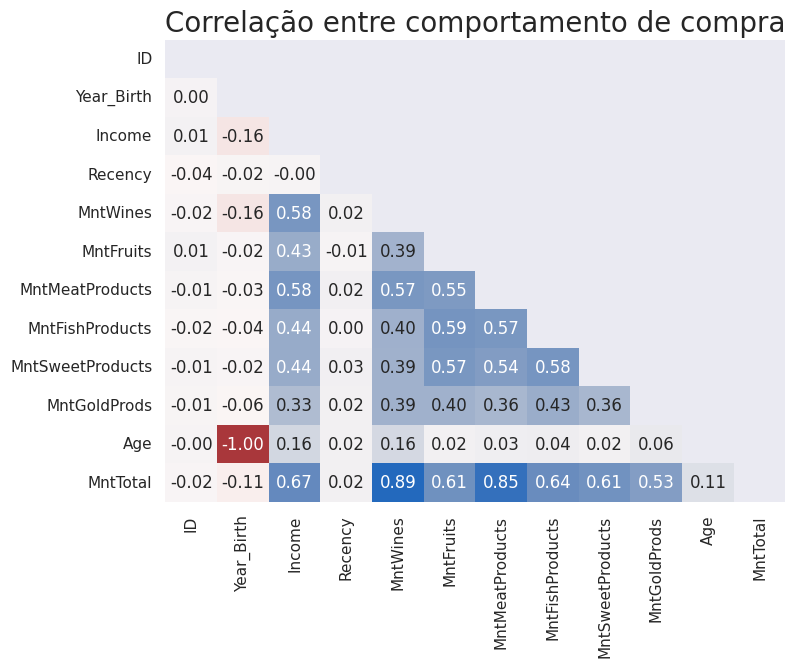

In [ ]:
purchase_numbers = purchase.select_dtypes('number')
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchase_numbers.corr(), dtype=bool))
sns.heatmap(purchase_numbers.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Correlação entre comportamento de compra', size=20, loc='left')
plt.show()

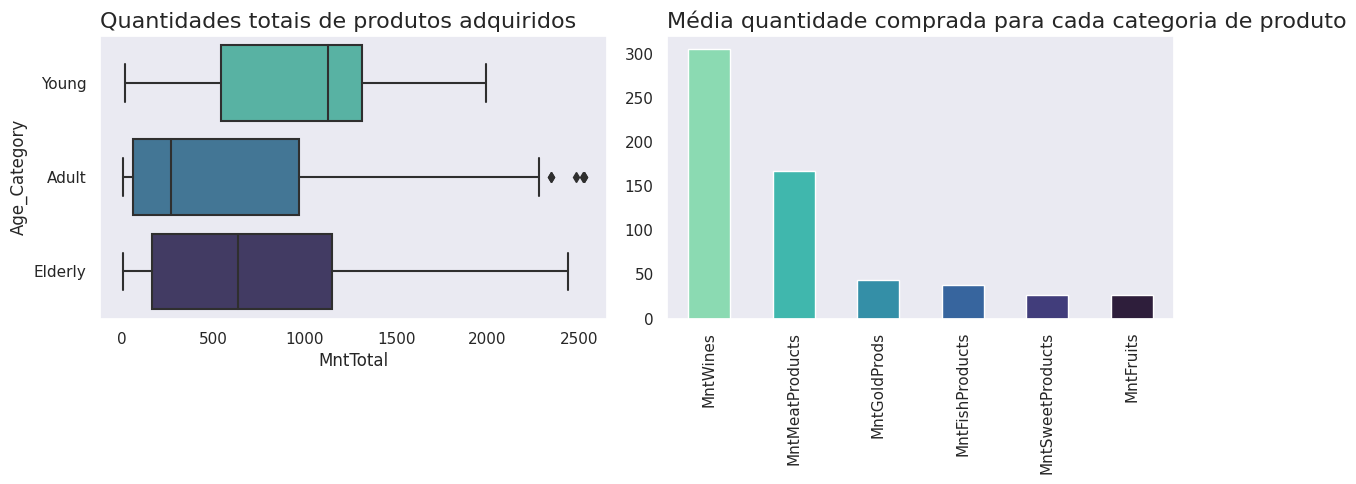

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='MntTotal',
            y='Age_Category',
            data=purchase,
            palette='mako_r',
            linewidth=1.5,
           ax=ax[0])
ax[0].set_title('Quantidades totais de produtos adquiridos', loc='left', size=16)

df_copy.loc[:,'MntWines':'MntGoldProds'].mean().sort_values(ascending=False)\
    .plot(kind='bar',
          color=sns.color_palette('mako_r'),
         ax=ax[1])
ax[1].set_title('Média quantidade comprada para cada categoria de produto', size=16, loc='left')

plt.tight_layout()
plt.show()

**É evidente que existe uma correlação entre a quantidade de produtos adquiridos e a idade do cliente, que por sua vez está ligada à sua renda. Geralmente, uma idade mais elevada corresponde a rendimentos mais elevados e a maiores compras de produtos.**

**Como observamos antes, há definitivamente um vencedor claro quando se trata de vendas (Compra de vinhos). No entanto, embora a quantidade de produtos relacionados à carne seja quase metade, eles ainda apresentam números bem relevantes.**

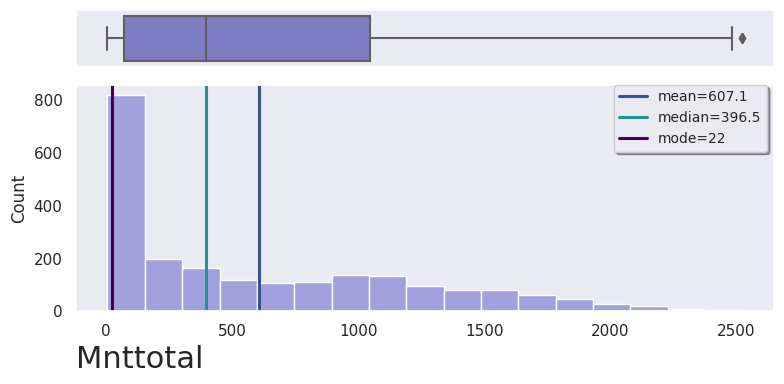

In [ ]:
df_copy['MntTotal'] = df_copy.loc[:,'MntWines':'MntGoldProds'].sum(1)

num_plot(purchase,'MntTotal')
plt.show()

In [ ]:
products = ['MntWines','MntFruits','MntMeatProducts',
            'MntFishProducts','MntSweetProducts','MntGoldProds','MntTotal']

purchase.groupby('Partner')[products].mean().astype(int).style.background_gradient(cmap='vlag_r')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
Partner,,,,,,,
Not Partner,308,27,174,38,27,45,622
Partner,303,25,163,36,26,42,598


In [ ]:
temp_df = pd.pivot_table(purchase, index='Partner', columns='Age_Category', values='MntTotal', aggfunc='mean')
print('Avg. Total amount purchased:')
temp_df.fillna(0).astype(int).style.background_gradient(cmap='vlag_r')

Avg. Total amount purchased:


Age_Category,Young,Adult,Elderly
Partner,,,
Not Partner,1068,559,737
Partner,630,545,716


**Clientes sem parceiro tendem a gastar mais na maioria das categorias, exceto em vinhos, onde a diferença é pequena. Isto provavelmente se deve à inclusão de clientes viúvos neste grupo, que normalmente têm mais de 60 anos e podem fazer parte do grupo demográfico com maiores gastos.**

#### E a relação dos clientes com os estabelecimentos? Como participação em campanhas ou reclamações e feedbacks

In [ ]:
!pip install squarify

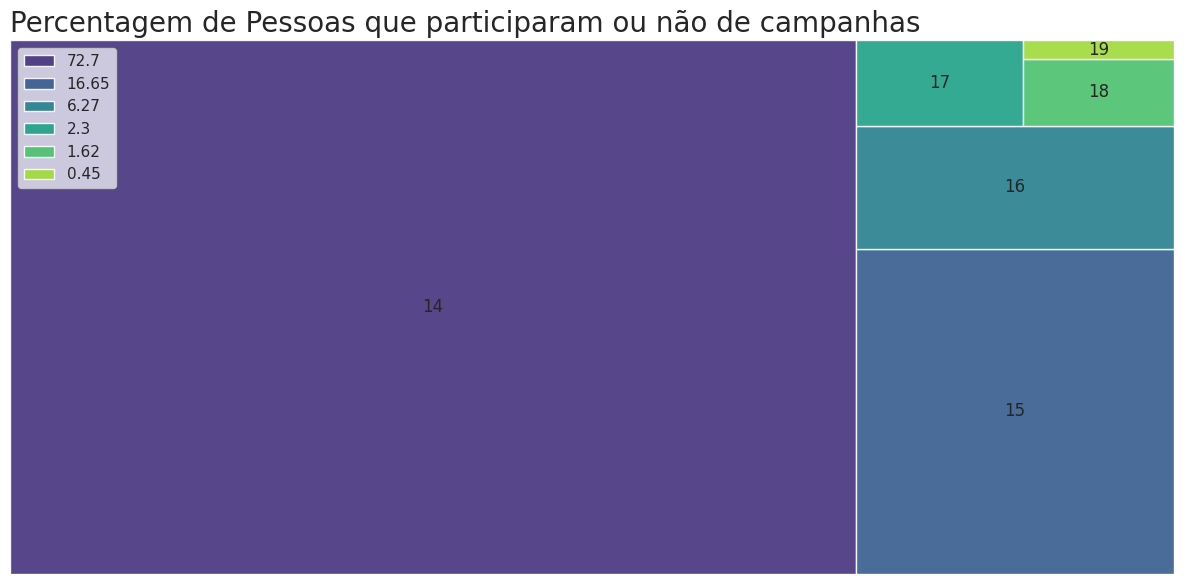

In [ ]:
import squarify
campaigns = df_copy.loc[:,'AcceptedCmp3':'Response'].drop('Complain', axis=1)

people_acceptance = campaigns.sum(1).value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12,6))
squarify.plot(sizes=people_acceptance, label=people_acceptance.index,
              color=sns.color_palette('viridis',len(people_acceptance)),
              alpha=.9)
plt.legend(np.round(people_acceptance*100,2))
plt.axis('off')
plt.title('Percentagem de Pessoas que participaram ou não de campanhas', loc='left', size=20)
plt.tight_layout()
plt.show()

**Aproximadamente 73% dos clientes nunca aceitaram nem mesmo uma única campanha de marketing.**

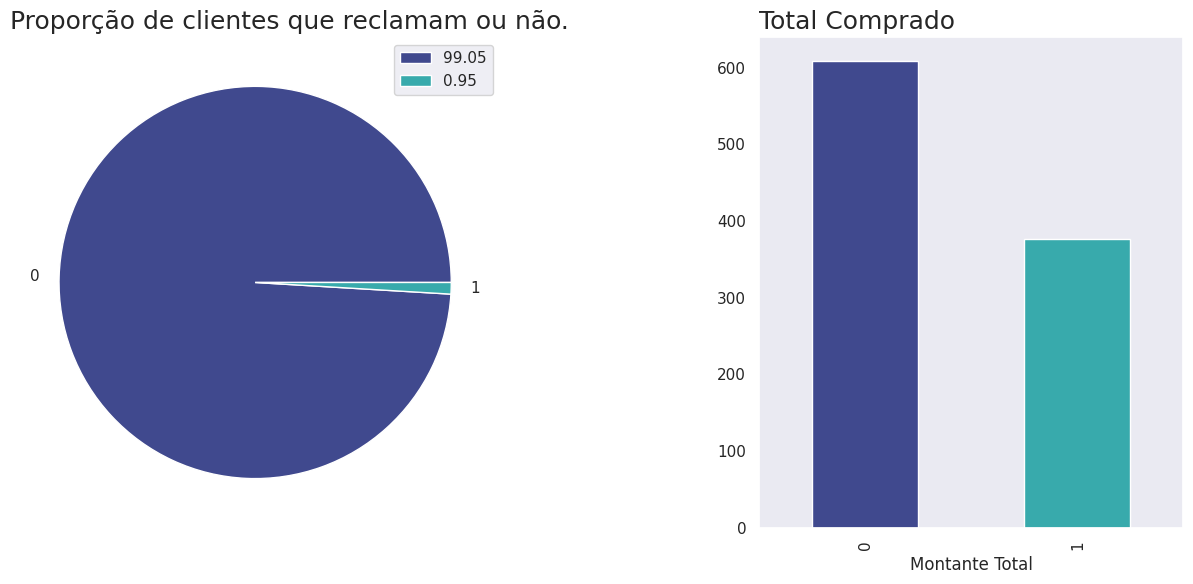

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

df_copy.loc[:, 'Complain'].value_counts().plot(kind='pie', ax=axes[0], colors=sns.color_palette('mako', 2))
axes[0].set_title('Proporção de clientes que reclamam ou não.', size=18, loc='left')
axes[0].legend(np.round(df_copy.loc[:, 'Complain'].value_counts(normalize=True) * 100, 2))
axes[0].axis('off')

df_copy.groupby('Complain')['MntTotal'].mean().plot(kind='bar', color=sns.color_palette('mako', 2), ax=axes[1])
axes[1].set_title('Total Comprado', size=18, loc='left')
axes[1].set_xlabel('Montante Total')

plt.tight_layout()
plt.show()

- 0 não reclama
- 1 reclama
- Menos de 1% dos clientes reclamaram.
- Como esperado, os clientes que reclamaram gastaram menos.

## Pré-Processamento

In [ ]:
df_copy.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal
0,5524,1957,Graduated,58138.0,0,0,2012-09-04,58,635,88,...,0,3,11,1,0,66,Not Partner,1,Elderly,1617
1,2174,1954,Graduated,46344.0,1,1,2014-03-08,38,11,1,...,0,3,11,0,2,69,Not Partner,3,Elderly,27
2,4141,1965,Graduated,71613.0,0,0,2013-08-21,26,426,49,...,0,3,11,0,0,58,Partner,2,Adult,776
3,6182,1984,Graduated,26646.0,1,0,2014-02-10,26,11,4,...,0,3,11,0,1,39,Partner,3,Adult,53
4,5324,1981,Post Graduated,58293.0,1,0,2014-01-19,94,173,43,...,0,3,11,0,1,42,Partner,3,Adult,422


In [ ]:
#Get list of categorical variables
s = (df_copy.dtypes == 'object')
object_cols = list(s[s].index)

print("Variáveis Categóricas:", object_cols)

Variáveis Categóricas: ['Education', 'Partner']


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-nul

In [ ]:
df_numerical = pd.get_dummies(df_copy,columns=['Education', 'Partner', 'Age_Category'])
df_numerical.drop(['Dt_Customer'], axis=1, inplace=True)
#df_numerical = df_numerical.dropna()

In [ ]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2216 non-null   int64  
 1   Year_Birth                2216 non-null   int64  
 2   Income                    2216 non-null   float64
 3   Kidhome                   2216 non-null   int64  
 4   Teenhome                  2216 non-null   int64  
 5   Recency                   2216 non-null   int64  
 6   MntWines                  2216 non-null   int64  
 7   MntFruits                 2216 non-null   int64  
 8   MntMeatProducts           2216 non-null   int64  
 9   MntFishProducts           2216 non-null   int64  
 10  MntSweetProducts          2216 non-null   int64  
 11  MntGoldProds              2216 non-null   int64  
 12  NumDealsPurchases         2216 non-null   int64  
 13  NumWebPurchases           2216 non-null   int64  
 14  NumCatal

### Normalização dos Dados

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

## Clusterização

### KMeans

**Após alguns testes, para a construção dos agrupamentos e consequentemente os seus clusters, utilizamos o algoritmo de KMeans.**

**Para a definição da quantidade de cluster, utilizamos Método Elbow para determinar o número de clusters a serem formados.**

O propósito desse código é determinar o número ideal de clusters (ou grupos) nos dados usando o método do cotovelo, onde o número de clusters é variado e o modelo é ajustado para cada valor. O gráfico resultante exibe a inércia (soma das distâncias quadráticas dentro de cada cluster) em função do número de clusters. O ponto em que a inércia começa a se estabilizar (o "cotovelo") é frequentemente escolhido como o número ótimo de clusters. Isso pode ajudar na escolha do valor apropriado para o parâmetro k no algoritmo de KMeans.

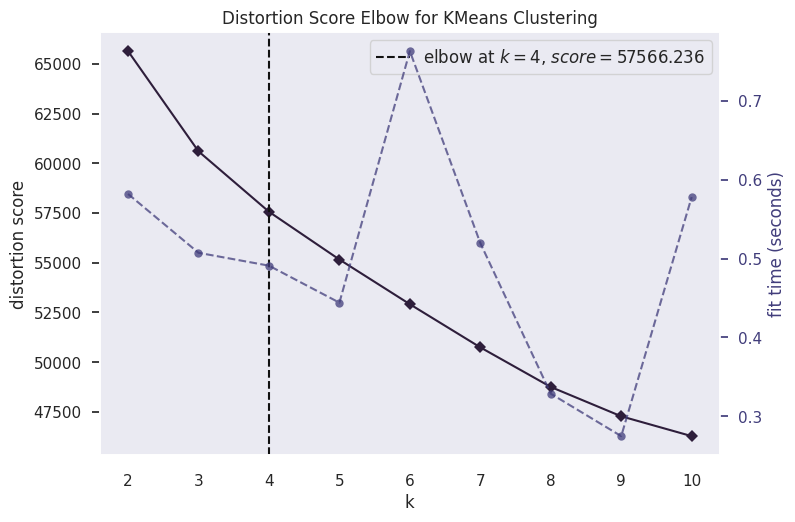

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_scaled)
Elbow_M.show()

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px

# Aplique o K-Means aos dados do PCA
kmeans = KMeans(n_clusters=4, random_state=42)  # Defina o número de clusters desejado
clusters = kmeans.fit_predict(df_scaled)

# Adicione as informações de cluster ao DataFrame PCA
df_copy['Cluster'] = clusters

# Tratando os outliers
df_copy = df_copy[(df_copy["Age"]<100)]
df_copy = df_copy[(df_copy["Income"]<200_000)]

fig = px.scatter(df_copy, x='Age', y='Income', color='Cluster', title='K-Means Clustering')

fig.show()

## Conclusão - README


Após a aplicação de o método de cotovelo, foi possível dividir os dados em 4 clusters.